<a href="https://colab.research.google.com/github/Zebfred/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/d4w1_Zeb_assignment_%26lectures_notes_LS_DS6_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [3]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-07-11 19:56:28--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                <=> ]  21.51M   866KB/s    in 26s     

2019-07-11 19:56:54 (854 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22559146]



In [4]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [0]:
!head LoanStats_2018Q4.csv

In [0]:
!tail LoanStats_2018Q4.csv

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd
df = pd.read_csv('LoanStats_2018Q4.csv')
df.head(20)

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv',skiprows=1,skipfooter=2, engine='python')
df.head()

In [0]:
print(df.shape)
df.isnull().sum().sort_values(ascending=False)

In [0]:
df = df.drop(['id','url','desc','member_id'], axis='columns')
#df.head()

In [0]:
df.head()

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
df.dtypes


In [0]:
df_ori = df
df_ori.head()

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
def remove_percent(string):
  return float(string.strip('%'))

Apply the function to the `int_rate` column

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_percent)

In [0]:
df.head()

### Clean `emp_title`

Look at top 20 titles

In [0]:
df['emp_title']

In [0]:
print(df['emp_title'].value_counts(dropna=False).shape)
df['emp_title'].value_counts(dropna=False).head(20)


How often is `emp_title` null?

In [25]:
df['emp_title'].isnull().sum()

20947

Clean the title and handle missing values

In [0]:
import numpy as np
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

In [27]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"
  return title.strip()

[clean_title(x) for x in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
# df = df.apply(lambda x: x.strip().title() if isinstance(x, str))

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_title)
print(df['emp_title'].value_counts(dropna=False).shape)
df['emp_title'].value_counts(dropna=False).head(20)

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df.head()
#dataframe filtering

In [0]:
managers = df[df['emp_title_manager'] == True]
workers = df[df['emp_title_manager'] == False]

In [34]:
print(managers['int_rate'].mean())
print(workers['int_rate'].mean())

12.760582149647126
12.957349045509492


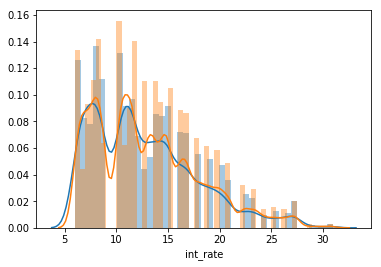

In [37]:
import seaborn as sns
sns.distplot(managers['int_rate'])
sns.distplot(workers['int_rate'])

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [38]:
df['issue_d'].head().values
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [0]:
df['issue_d'].dt.year
df['issue_d'].dt.month

In [0]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month


In [42]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], 
                                        infer_datetime_format=True)

In [0]:
(df['issue_d'] - df['earliest_cr_line']).dt.days

In [0]:
df['days_from_earliest_credit_to_issue'] = (
    df['issue_d'] - df['earliest_cr_line']).dt.days

df.head()

In [0]:
df['years_from_earliest_credit_to_issue'] = (df['days_from_earliest_credit_to_issue'] / 365)
df.head()

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
#code^^^ is replicated
df.head()

In [0]:
#def remove_percent(string):
  #return float(string.strip('%'))
  #df['int_rate'] = df['int_rate'].apply(remove_percent)


In [0]:
def remove_months(string):
  return float(string.strip('months'))
#df['term'] = df['term'].apply(remove_months)

In [0]:
df['term'] = df['term'].apply(remove_months)

In [0]:
df.head().T

In [0]:
#df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
#df.head()
df['loan_status_is_great'] = df['loan_status'].str.contains('is_great')

In [61]:
df['loan_status'].isnull().sum()
#managers = df[df['emp_title_manager'] == True]
#workers = df[df['emp_title_manager'] == False]

#Good = df[df['loan']]

0

In [65]:
df.loan_status_is_great.describe()

count     128412
unique         1
top        False
freq      128412
Name: loan_status_is_great, dtype: object

In [0]:
#df.loan_status_is_great.head(120000) 
#if x == 'Current':
   # return 1
#  elif x == 'Fully Paid':
   # return 1
 #else:
   # return 0
#```df['loan_status_is_great'] = df['loan_status'].apply(status)```

def status(x):
  if x == 'Current':
    return 1
  elif x == 'Fully Paid':
    return 1
  else:
    return 0
  
df['loan_status_is_great'] = df['loan_status'].apply(status)





In [0]:
df.loan_status_is_great.head()

In [0]:
df.head().T

In [76]:

[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
#df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

#df['last_pymnt_d'].head(20).values
#df['last_pymnt_d'].describe()
import pandas as pd

df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)

In [0]:
df['last_pymnt_d'].head().values
#df['issue_year'] = df['issue_d'].dt.year
#df['issue_month'] = df['issue_d'].dt.month
df['last_pymnt_d'].dt.year
df['last_pymnt_d'].dt.month


In [0]:
df['last_pymnt_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_month'] = df['last_pymnt_d'].dt.month

In [0]:
df.head().T

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01